#<center> 5P07 Final Project <center>#


---


####<center> Nazanin Mehregan <center>####
####<center> Clement Frimpong Osei <center>####

#Import Libraries

In [1]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.api import Index

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load json Files

In [3]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [4]:
ts_files = sorted(glob.glob('/content/drive/MyDrive/5P07 Files/timeseries/*.*'), key=numericalSort)

cp_files = sorted(glob.glob("/content/drive/MyDrive/5P07 Files/changepoint/*.json"), key=numericalSort)

classification_files = sorted(glob.glob("/content/drive/MyDrive/5P07 Files/classification/*.json"), key=numericalSort)

In [5]:
len(ts_files)

586

In [6]:
len(cp_files)

586

In [7]:
len(classification_files)

586

#Load json into DataFrames

In [8]:
# load json file using pandas
# We have 19 benchmarks for one application
# each benchmark has 10 rows and 3000 columns -> time- series data
# 190 * 3000
df_ts = pd.DataFrame()
for count,ele in enumerate(ts_files,len(ts_files)):
    df_ts = pd.concat([df_ts, pd.read_json(ele)])

df_ts.to_csv("df_ts.csv",index=False)

df_ts

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,6.093054e-07,1.008766e-07,7.422129e-08,7.440597e-08,8.271708e-08,7.415438e-08,7.408692e-08,7.407886e-08,7.499953e-08,7.532632e-08,...,7.562576e-08,7.543878e-08,7.714915e-08,7.549085e-08,7.712075e-08,7.541605e-08,7.539058e-08,7.650349e-08,7.698779e-08,7.711344e-08
1,4.371432e-07,9.917692e-08,7.465128e-08,8.173159e-08,8.471010e-08,7.467739e-08,7.517885e-08,7.460711e-08,8.075791e-08,7.418114e-08,...,7.535353e-08,7.538180e-08,7.557068e-08,7.560864e-08,7.535050e-08,7.537228e-08,7.553813e-08,7.560392e-08,7.676286e-08,7.705187e-08
2,4.559933e-07,8.824669e-08,7.509677e-08,7.451636e-08,8.002800e-08,7.424313e-08,7.452078e-08,7.446165e-08,7.484769e-08,8.033209e-08,...,7.604797e-08,7.460847e-08,7.497649e-08,7.473235e-08,7.463946e-08,7.462064e-08,7.491350e-08,7.467016e-08,7.615133e-08,7.466638e-08
3,4.502572e-07,8.446161e-08,7.309981e-08,7.319347e-08,7.910075e-08,7.358772e-08,7.905828e-08,7.317978e-08,7.317995e-08,7.330697e-08,...,7.142657e-08,7.323198e-08,7.150262e-08,7.140253e-08,7.144517e-08,7.312931e-08,7.324323e-08,7.145007e-08,7.285540e-08,7.144954e-08
4,4.651540e-07,8.810434e-08,9.000652e-08,8.886459e-08,8.393759e-08,7.439618e-08,7.602797e-08,7.542491e-08,7.896595e-08,7.418794e-08,...,7.368990e-08,7.531010e-08,7.375163e-08,7.425882e-08,7.489334e-08,7.538770e-08,7.423248e-08,7.538998e-08,7.426841e-08,7.420183e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6.710492e-07,9.165085e-08,7.133146e-08,6.931089e-08,7.561662e-08,7.702528e-08,6.528784e-08,6.862012e-08,7.212665e-08,6.869149e-08,...,6.690253e-08,6.689220e-08,6.755680e-08,6.692899e-08,6.790748e-08,6.694410e-08,6.736341e-08,6.679444e-08,6.685947e-08,6.758146e-08
6,7.120457e-07,9.884524e-08,6.343081e-08,5.858637e-08,5.869167e-08,5.963465e-08,5.842380e-08,7.106819e-08,6.209835e-08,6.729666e-08,...,5.821861e-08,5.924808e-08,5.815925e-08,5.822840e-08,5.894470e-08,5.817741e-08,5.809703e-08,5.817071e-08,5.820942e-08,5.836662e-08
7,7.142616e-07,8.781972e-08,7.167950e-08,6.699401e-08,6.331204e-08,6.334807e-08,6.167693e-08,6.205597e-08,6.524793e-08,7.645720e-08,...,6.209503e-08,6.316114e-08,6.243816e-08,6.212132e-08,6.214469e-08,6.215534e-08,6.374079e-08,6.174308e-08,6.290686e-08,6.158733e-08
8,6.903439e-07,8.850170e-08,7.389416e-08,7.489292e-08,7.387444e-08,7.209579e-08,7.165889e-08,7.139837e-08,7.140703e-08,7.138550e-08,...,7.238135e-08,7.135600e-08,7.123215e-08,7.131974e-08,7.125351e-08,7.127286e-08,7.138115e-08,7.189904e-08,7.128085e-08,7.124227e-08


In [9]:
df_cp = pd.DataFrame()
for count,ele in enumerate(cp_files,len(cp_files)):
    df_cp = pd.concat([df_cp, pd.read_json(ele)])

# convert dataframe to csv file
df_cp.to_csv("df_cp.csv",index=False)

df_cp

,0,1,2,3,4,5,6,7,8,9,...,979,980,981,982,983,984,985,986,987,988
0,1,461.0,2686.0,2869.0,2917.0,2999.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,636.0,2686.0,2999.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92,2999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129,2999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,191.0,2999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1,1869.0,1964.0,2248.0,2263.0,2397.0,2999.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,412.0,2999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,2999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,2999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_class = pd.DataFrame()
for count,ele in enumerate(classification_files,len(classification_files)):
    df_class = pd.concat([df_class, pd.read_json(ele)])

df_class.to_csv("df_class.csv",index=False)

df_class

,run,forks,steady_state_starts
0,inconsistent,no steady state,-1
1,inconsistent,steady state,0
2,inconsistent,steady state,0
3,inconsistent,steady state,0
4,inconsistent,steady state,3
...,...,...,...
5,inconsistent,steady state,2397
6,inconsistent,steady state,1
7,inconsistent,steady state,0
8,inconsistent,steady state,1


In [ ]:
df_ts = pd.read_csv('/content/drive/MyDrive/5P07 Files/df_ts.csv')
df_cp = pd.read_csv('/content/drive/MyDrive/5P07 Files/df_cp.csv')
df_class = pd.read_csv('/content/drive/MyDrive/5P07 Files/df_class.csv')

#Merge Dataframes and Extract Statistical Features


In [11]:
#getting the maximum number of points in the changepoint dataframe for each fork
l1 = np.array(df_cp.apply(lambda x: x.count(), axis=1))

#seperating the forks of each benchmark (10 by 10)
l3 = np.reshape(l1, (-1, 10))

# getting max, min, avg, and std of changepoints for each benchmark
l4 = pd.DataFrame(l3)
max_elements = l4.max(axis=1)
min_elements = l4.min(axis=1)
sum_elements = l4.sum(axis=1)
std_elements = l4.std(axis=1)

#getting the value of run elements to add to dataframe
l5 = np.array(df_class['run'])
l6 = np.reshape(l5, (-1, 10))
run_elements = l6.max(axis=1)

# getting the number of steady and no steady forks for each benchmark
l7 = np.array(df_class['forks'])
l8 = np.reshape(l7, (-1, 10))
l9 = pd.DataFrame(l8)
l10 = l9.transpose()
list1 = []
list2 = []
for i in range(0,586):
  list1.append(l10[i].value_counts()[0])
  list2.append(10 - l10[i].value_counts()[0])
list2

#getting the steady start feature
l11 = np.array(df_class['steady_state_starts'])
l12 = np.reshape(l11, (-1, 10))
l13 = pd.DataFrame(l12)
max_ssp = l13.max(axis=1)
min_ssp = l13[l13 > -1].min(axis=1)
avg_ssp = l13[l13 > -1].sum(axis=1)
count_ssp = l13[l13 > -1].count(axis=1)

l2 = pd.DataFrame(0, index=np.arange(586), columns=['Run(State)','# steady forks', '# no steady forks',
                                                   'Min_CP','Max_CP','Average_CP','Std_CP','max_ssp','min_ssp','avg_ssp'])
l2['Run(State)'] = run_elements
l2['# steady forks']= list1
l2['# no steady forks'] = list2
l2['Min_CP']= min_elements
l2['Max_CP']= max_elements
l2['Average_CP']= sum_elements/10
l2['Std_CP']= std_elements
l2['max_ssp'] = max_ssp
l2['min_ssp'] = min_ssp
l2['avg_ssp'] = avg_ssp/count_ssp

df_features = l2.copy()
df_features

,Run(State),# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
0,inconsistent,9,1,2,6,2.7,1.337494,3,0.0,0.333333
1,inconsistent,7,3,5,21,9.7,4.643993,2483,610.0,1469.857143
2,inconsistent,8,2,2,20,10.6,5.929212,2250,135.0,850.000000
3,inconsistent,5,5,3,13,7.4,3.169297,1766,39.0,975.600000
4,inconsistent,7,3,2,18,9.0,6.289321,2410,366.0,1340.857143
...,...,...,...,...,...,...,...,...,...,...
581,inconsistent,9,1,3,11,6.3,2.359378,1109,150.0,444.222222
582,steady state,10,0,2,6,4.4,1.505545,2481,1.0,878.300000
583,steady state,10,0,2,5,2.9,0.994429,1,0.0,0.700000
584,inconsistent,8,2,2,6,3.5,1.354006,1,0.0,0.375000


Every fork needs to be steady for the benchmark to reach a steady state.

#Translate String to Binary

In [12]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 585
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Run(State)         586 non-null    object 
 1   # steady forks     586 non-null    int64  
 2   # no steady forks  586 non-null    int64  
 3   Min_CP             586 non-null    int64  
 4   Max_CP             586 non-null    int64  
 5   Average_CP         586 non-null    float64
 6   Std_CP             586 non-null    float64
 7   max_ssp            586 non-null    int64  
 8   min_ssp            586 non-null    float64
 9   avg_ssp            586 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 50.4+ KB


In [13]:
df_decoded = df_features.copy()

run_dict = {
    "inconsistent": 0,
    "steady state": 1
}

df_decoded['Run(State)'] = df_features['Run(State)'].map(run_dict)

df_decoded

,Run(State),# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
0,0,9,1,2,6,2.7,1.337494,3,0.0,0.333333
1,0,7,3,5,21,9.7,4.643993,2483,610.0,1469.857143
2,0,8,2,2,20,10.6,5.929212,2250,135.0,850.000000
3,0,5,5,3,13,7.4,3.169297,1766,39.0,975.600000
4,0,7,3,2,18,9.0,6.289321,2410,366.0,1340.857143
...,...,...,...,...,...,...,...,...,...,...
581,0,9,1,3,11,6.3,2.359378,1109,150.0,444.222222
582,1,10,0,2,6,4.4,1.505545,2481,1.0,878.300000
583,1,10,0,2,5,2.9,0.994429,1,0.0,0.700000
584,0,8,2,2,6,3.5,1.354006,1,0.0,0.375000


In [14]:
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 585
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Run(State)         586 non-null    int64  
 1   # steady forks     586 non-null    int64  
 2   # no steady forks  586 non-null    int64  
 3   Min_CP             586 non-null    int64  
 4   Max_CP             586 non-null    int64  
 5   Average_CP         586 non-null    float64
 6   Std_CP             586 non-null    float64
 7   max_ssp            586 non-null    int64  
 8   min_ssp            586 non-null    float64
 9   avg_ssp            586 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 50.4 KB


#Descriptive Statistics and Correlation Matrix

In [15]:
df_decoded.describe()

,Run(State),# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.564846,9.056314,0.943686,3.634812,19.104096,9.326109,5.040410,1198.027304,107.353242,444.650829
std,0.496201,1.354411,1.354411,3.224863,61.065226,19.145844,19.906116,960.040640,348.718832,505.763039
min,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,2.000000,6.000000,3.600000,1.294153,127.750000,0.000000,34.425000
50%,1.000000,10.000000,0.000000,2.000000,11.000000,6.400000,2.737576,1268.000000,1.000000,294.450000
75%,1.000000,10.000000,2.000000,4.000000,19.000000,10.575000,4.504005,2197.000000,39.750000,634.791667
max,1.000000,10.000000,5.000000,42.000000,989.000000,317.300000,331.531145,2497.000000,2415.000000,2418.000000


In [16]:
corr_matrix = df_decoded.corr()
corr_matrix

,Run(State),# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
Run(State),1.000000,0.794496,-0.794496,-0.210578,-0.001436,-0.059871,0.011331,-0.525535,-0.169275,-0.503834
# steady forks,0.794496,1.000000,-1.000000,-0.201142,-0.026133,-0.076959,-0.014252,-0.490558,-0.257461,-0.564597
# no steady forks,-0.794496,-1.000000,1.000000,0.201142,0.026133,0.076959,0.014252,0.490558,0.257461,0.564597
Min_CP,-0.210578,-0.201142,0.201142,1.000000,0.549783,0.565528,0.490047,0.177621,0.165992,0.303143
Max_CP,-0.001436,-0.026133,0.026133,0.549783,1.000000,0.960854,0.989459,-0.024277,0.022157,0.021057
Average_CP,-0.059871,-0.076959,0.076959,0.565528,0.960854,1.000000,0.967709,0.032978,0.036062,0.081499
Std_CP,0.011331,-0.014252,0.014252,0.490047,0.989459,0.967709,1.000000,-0.035674,0.009508,0.001998
max_ssp,-0.525535,-0.490558,0.490558,0.177621,-0.024277,0.032978,-0.035674,1.000000,0.267427,0.750552
min_ssp,-0.169275,-0.257461,0.257461,0.165992,0.022157,0.036062,0.009508,0.267427,1.000000,0.699922
avg_ssp,-0.503834,-0.564597,0.564597,0.303143,0.021057,0.081499,0.001998,0.750552,0.699922,1.000000


**We have the most correlation between benchmark state and 
number of steady forks in the benchmark.
The second place regarding correlation is the  maximum starting steady point in the forks of a benchmark and the benchmark state.**

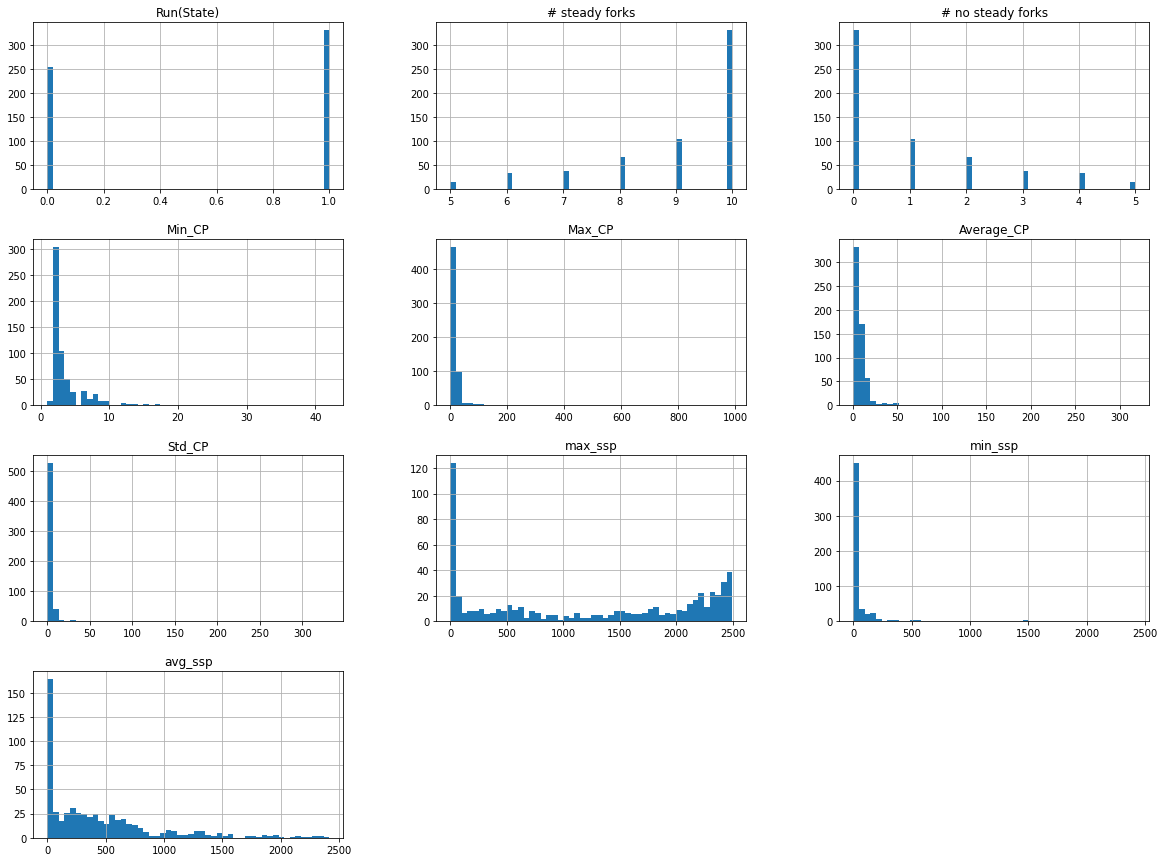

In [17]:
df_decoded.hist(bins=50, figsize=(20,15))
plt.show()

#Removing the Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


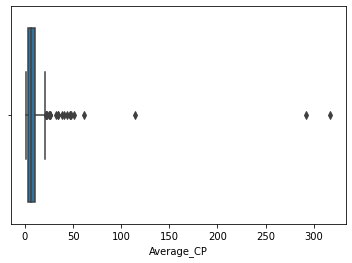

In [18]:
import seaborn as sns
sns.boxplot(df_decoded['Average_CP'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


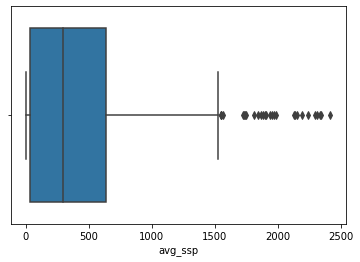

In [19]:
sns.boxplot(df_decoded['avg_ssp'])

In [20]:
''' Detection '''
# IQR
Q1 = np.percentile(df_decoded['Average_CP'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_decoded['Average_CP'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_decoded.shape)

# Upper bound
upper = np.where(df_decoded['Average_CP'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_decoded['Average_CP'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
data_no_outliers_avg = df_decoded.copy()

data_no_outliers_avg.drop(upper[0], inplace = True)
data_no_outliers_avg.drop(lower[0], inplace = True)
 
print("New Shape: ", data_no_outliers_avg.shape)

Old Shape:  (586, 10)
New Shape:  (564, 10)


#Data Visualization

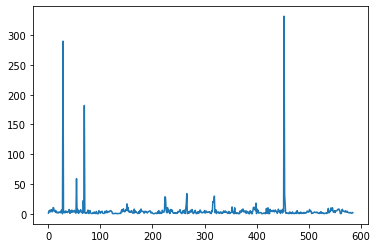

In [21]:
# sns.rugplot(l2['Standard Deviation'])
fig = plt.figure()

ax = fig.add_subplot(111)
index = list(range(0, 586, 1))
deviations = df_decoded['Std_CP']
# ax.bar(index,deviations)
# ax.set_ylabel("Indexes")
# ax.set_xlabel("Standard Deviations")
# ax.set_title(f"Deviations Against States")
# plt.show()
plt.plot(index, deviations)

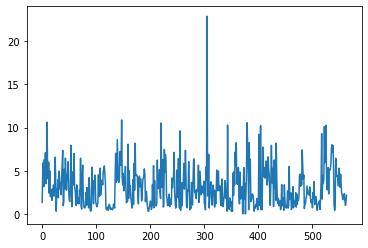

In [22]:
# sns.rugplot(l2['Standard Deviation'])
fig = plt.figure()

ax = fig.add_subplot(111)
index = list(range(0, 564, 1))
deviations = data_no_outliers_avg['Std_CP']
# ax.bar(index,deviations)
# ax.set_ylabel("Indexes")
# ax.set_xlabel("Standard Deviations")
# ax.set_title(f"Deviations Against States")
# plt.show()
plt.plot(index, deviations)

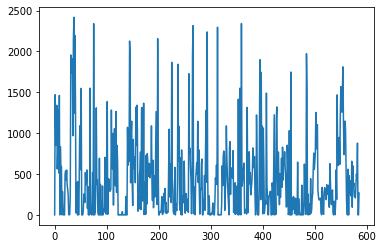

In [23]:
# sns.rugplot(l2['Standard Deviation'])
fig = plt.figure()

ax = fig.add_subplot(111)
index = list(range(0, 586, 1))
deviations = df_decoded['avg_ssp']
# ax.bar(index,deviations)
# ax.set_ylabel("Indexes")
# ax.set_xlabel("Standard Deviations")
# ax.set_title(f"Deviations Against States")
# plt.show()
plt.plot(index, deviations)

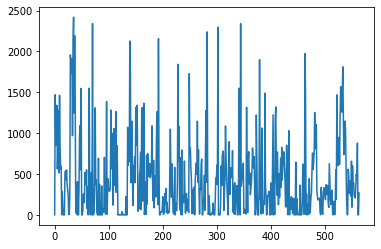

In [24]:
# sns.rugplot(l2['Standard Deviation'])
fig = plt.figure()

ax = fig.add_subplot(111)
index = list(range(0, 564, 1))
deviations = data_no_outliers_avg['avg_ssp']
# ax.bar(index,deviations)
# ax.set_ylabel("Indexes")
# ax.set_xlabel("Standard Deviations")
# ax.set_title(f"Deviations Against States")
# plt.show()
plt.plot(index, deviations)

#KNN Classification

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
train_set, test_set = train_test_split(df_decoded, test_size = 0.2, random_state = 42)

In [27]:
train_set

,Run(State),# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
131,1,10,0,2,3,2.4,0.516398,3,0.0,0.600000
153,0,7,3,4,38,18.5,10.875559,889,341.0,566.333333
77,1,10,0,3,6,4.5,0.971825,2,0.0,1.600000
437,0,9,1,3,20,11.6,5.168279,1695,4.0,338.444444
255,1,10,0,1,6,3.3,1.494434,864,0.0,190.900000
...,...,...,...,...,...,...,...,...,...,...
71,1,10,0,2,6,2.8,1.229273,0,0.0,0.000000
106,1,10,0,2,5,3.3,0.823273,575,16.0,289.200000
270,1,10,0,3,6,3.4,0.966092,10,0.0,1.500000
435,0,9,1,5,18,11.5,3.807887,2223,25.0,453.000000


In [28]:
train_set.iloc[:,1:10]

,# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
131,10,0,2,3,2.4,0.516398,3,0.0,0.600000
153,7,3,4,38,18.5,10.875559,889,341.0,566.333333
77,10,0,3,6,4.5,0.971825,2,0.0,1.600000
437,9,1,3,20,11.6,5.168279,1695,4.0,338.444444
255,10,0,1,6,3.3,1.494434,864,0.0,190.900000
...,...,...,...,...,...,...,...,...,...
71,10,0,2,6,2.8,1.229273,0,0.0,0.000000
106,10,0,2,5,3.3,0.823273,575,16.0,289.200000
270,10,0,3,6,3.4,0.966092,10,0.0,1.500000
435,9,1,5,18,11.5,3.807887,2223,25.0,453.000000


In [29]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(train_set.iloc[:,1:10], train_set['Run(State)'])

KNeighborsClassifier(n_neighbors=40)

In [30]:
knn.score(test_set.iloc[:,1:10], test_set['Run(State)'])

0.7203389830508474

Text(42.0, 0.5, 'Truth')

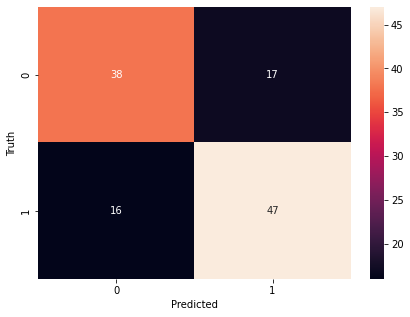

In [31]:
y_pred = knn.predict(test_set.iloc[:,1:10])
cm = confusion_matrix(test_set['Run(State)'], y_pred)
%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
print(classification_report(test_set['Run(State)'], y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70        55
           1       0.73      0.75      0.74        63

    accuracy                           0.72       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.72      0.72      0.72       118



#SVM Classification

In [33]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)

In [34]:
SVM.fit(train_set.iloc[:,1:10], train_set['Run(State)'])

SVC(kernel='linear', random_state=0)

In [35]:
train_set.iloc[:,1:10]

,# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
131,10,0,2,3,2.4,0.516398,3,0.0,0.600000
153,7,3,4,38,18.5,10.875559,889,341.0,566.333333
77,10,0,3,6,4.5,0.971825,2,0.0,1.600000
437,9,1,3,20,11.6,5.168279,1695,4.0,338.444444
255,10,0,1,6,3.3,1.494434,864,0.0,190.900000
...,...,...,...,...,...,...,...,...,...
71,10,0,2,6,2.8,1.229273,0,0.0,0.000000
106,10,0,2,5,3.3,0.823273,575,16.0,289.200000
270,10,0,3,6,3.4,0.966092,10,0.0,1.500000
435,9,1,5,18,11.5,3.807887,2223,25.0,453.000000


In [36]:
SVM.score(test_set.iloc[:,1:10], test_set['Run(State)'])

0.9915254237288136

In [37]:
y_pred_svm = SVM.predict(test_set.iloc[:,1:10])
print(classification_report(test_set['Run(State)'], y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.98      0.99        63

    accuracy                           0.99       118
   macro avg       0.99      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118



Text(42.0, 0.5, 'Truth')

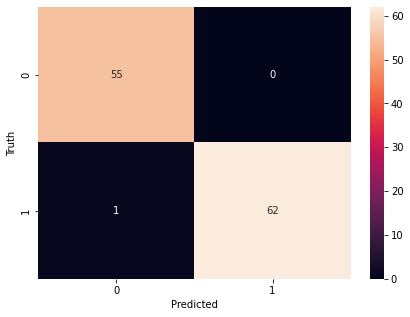

In [38]:
cm_svm = confusion_matrix(test_set['Run(State)'], y_pred_svm)
%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#k-means clustering

In [39]:
from sklearn.cluster import KMeans

In [40]:
# Convert DataFrame to matrix
mat = data_no_outliers_avg.values
# Using sklearn
km = KMeans(n_clusters=3)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([data_no_outliers_avg.index,labels]).T

In [41]:
results

,0,1
0,0,1
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
559,581,1
560,582,2
561,583,1
562,584,1


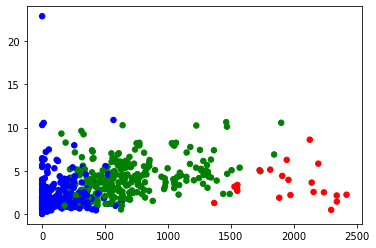

In [42]:
# Grab a scatterplot
import matplotlib.pyplot as plt
colors = [
    "red" if x == 0 else "blue" if x == 1 else "green" for x in results[1]]
plt.scatter(data_no_outliers_avg['avg_ssp'], data_no_outliers_avg['Std_CP'], s=30, c=colors)

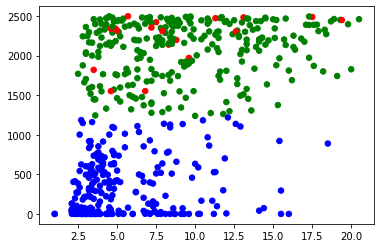

In [43]:
# Grab a scatterplot
import matplotlib.pyplot as plt
colors = [
    "red" if x == 0 else "blue" if x == 1 else "green" for x in results[1]]
plt.scatter(data_no_outliers_avg['Average_CP'], data_no_outliers_avg['max_ssp'], s=30, c=colors)

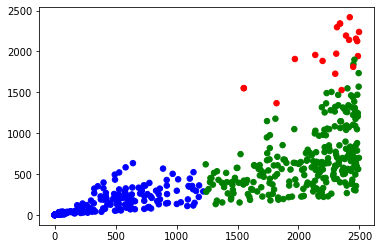

In [44]:
# Grab a scatterplot
import matplotlib.pyplot as plt
colors = [
    "red" if x == 0 else "blue" if x == 1 else "green" for x in results[1]]
plt.scatter(data_no_outliers_avg['max_ssp'], data_no_outliers_avg['avg_ssp'], s=30, c=colors)

#Clusters and Run States

In [45]:
# Convert DataFrame to matrix
mat = data_no_outliers_avg.loc[:, data_no_outliers_avg.columns != 'Run(State)'].values
# Using sklearn
km = KMeans(n_clusters=2)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results_1 = pd.DataFrame([data_no_outliers_avg.loc[:, data_no_outliers_avg.columns != 'Run(State)'].index,labels]).T
results_1

,0,1
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
559,581,0
560,582,1
561,583,0
562,584,0


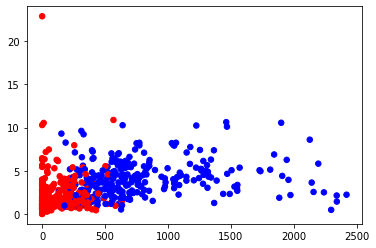

In [46]:
# Grab a scatterplot
import matplotlib.pyplot as plt
colors = ["red" if x == 0 else "blue" for x in results_1[1]]
plt.scatter(data_no_outliers_avg['avg_ssp'], data_no_outliers_avg['Std_CP'], s=30, c=colors)

In [47]:
import pandas as pd
a = np.array(data_no_outliers_avg['Run(State)'])
b = np.array(results_1[1])
data={'Run(State)':a,'cluster':b}
df=pd.DataFrame(data)

df

,Run(State),cluster
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
559,0,0
560,1,1
561,1,0
562,0,0


In [48]:
len(np.where(df['cluster'] == df['Run(State)'])[0])/len(df['Run(State)'])

0.2624113475177305

In [49]:
df1 = data_no_outliers_avg.copy()
df1['cluster'] = b
df1['key'] = '--'

# =================================================================

for index, row in df1.iterrows():
  if df1['Run(State)'][index] == df1['cluster'][index]:
    df1['key'][index] = 'True'
  else:
    df1['key'][index] = 'False'

df2 = df1[df1['key']!='True']
df3 = df1[df1['key']!='False']

# =================================================================

df4 = pd.DataFrame(columns=data_no_outliers_avg.columns)
df4['Run(State)'] = [df2['Run(State)'].sum() / len(df2['Run(State)']),df3['Run(State)'].sum() / len(df3['Run(State)'])]
df4['# steady forks'] = [df2['# steady forks'].sum() / len(df2['# steady forks']),df3['# steady forks'].sum() / len(df3['# steady forks'])]
df4['# no steady forks'] = [df2['# no steady forks'].sum() / len(df2['# no steady forks']),df3['# no steady forks'].sum() / len(df3['# no steady forks'])]
df4['Min_CP'] = [df2['Min_CP'].sum() / len(df2['Min_CP']),df3['Min_CP'].sum() / len(df3['Min_CP'])]
df4['Max_CP'] = [df2['Max_CP'].sum() / len(df2['Max_CP']),df3['Max_CP'].sum() / len(df3['Max_CP'])]
df4['Average_CP'] = [df2['Average_CP'].sum() / len(df2['Average_CP']),df3['Average_CP'].sum() / len(df3['Average_CP'])]
df4['Std_CP'] = [df2['Std_CP'].sum() / len(df2['Std_CP']),df3['Std_CP'].sum() / len(df3['Std_CP'])]
df4['max_ssp'] = [df2['max_ssp'].sum() / len(df2['max_ssp']),df3['max_ssp'].sum() / len(df3['max_ssp'])]
df4['min_ssp'] = [df2['min_ssp'].sum() / len(df2['min_ssp']),df3['min_ssp'].sum() / len(df3['min_ssp'])]
df4['avg_ssp'] = [df2['avg_ssp'].sum() / len(df2['avg_ssp']),df3['avg_ssp'].sum() / len(df3['avg_ssp'])]

df4

<ipython-input-49-94f02a16fa2e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['key'][index] = 'True'
<ipython-input-49-94f02a16fa2e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['key'][index] = 'False'


,Run(State),# steady forks,# no steady forks,Min_CP,Max_CP,Average_CP,Std_CP,max_ssp,min_ssp,avg_ssp
0,0.543269,8.971154,1.028846,3.331731,12.932692,7.323077,3.115825,1127.235577,99.288462,444.612448
1,0.635135,9.391892,0.608108,2.986486,12.317568,6.923649,3.038346,1422.878378,90.912162,408.212814
